In [11]:
%load_ext autoreload
%autoreload 2

import jax
from jax import grad, jit, jvp, random, vjp
from jax.scipy.sparse.linalg import cg, gmres
import jax.numpy as jnp
import nopt
import matplotlib.pyplot as plt
from IPython.display import HTML, Image

from nopt.problems import InvertedPendulum, CartPole
from nopt import solve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# ip = InvertedPendulum()
# bcs = dict(x0=jnp.array([jnp.pi, 0.]),
#           xN=jnp.array([0., 0.]))

ip = CartPole(r=1e-4)
bcs = dict(
    x0=jnp.array([0., 0., 0., 0.]),
    xN=jnp.array([0., 0., jnp.pi, 0.])
)

N = 300

p = nopt.NlpProblem(ip,boundary_conditions=bcs, N=N, T=2)

statedim = ip.statedim

def outer_callback(z, lam):
    x, u = p._splitz(z)
    c_norm = jnp.linalg.norm(p.c(z))
    print(f"--- ||c(x)|| = {c_norm}")
    print(f"--- x(0) = {x[:statedim]}")
    print(f"--- x(T) = {x[-statedim:]}")
    

xstar = solve(p, outer_callback=outer_callback, max_iters=10, solver=gmres)


--iter: 1
--- ||c(x)|| = 1.3344651460647583
--- x(0) = [-0.00044546 -0.0002218   0.00168882  0.00133519]
--- x(T) = [ 4.49191459e-04 -6.95855648e-04  2.19403100e+00 -1.11746835e-04]

--iter: 2
--- ||c(x)|| = 0.9669623374938965
--- x(0) = [-0.00118954 -0.0011988   0.00381989 -0.00189684]
--- x(T) = [ 1.1150447e-03 -1.0960631e-03  2.8455994e+00  2.5725067e-03]

--iter: 3
--- ||c(x)|| = 0.34135201573371887
--- x(0) = [-0.0025091  -0.00162413  0.00427167 -0.00280045]
--- x(T) = [ 2.4643047e-03 -3.3496290e-03  3.0377960e+00  5.2325041e-03]

--iter: 4
--- ||c(x)|| = 0.21114617586135864
--- x(0) = [-0.00322666 -0.00207151  0.00163124 -0.00300506]
--- x(T) = [ 0.00319721 -0.00434613  3.0937502   0.00651741]

--iter: 5
--- ||c(x)|| = 0.18484292924404144
--- x(0) = [-3.4814551e-03 -2.3137792e-03  3.9899256e-05 -2.8830271e-03]
--- x(T) = [ 0.00346272 -0.00462375  3.1111944   0.00676354]

--iter: 6
--- ||c(x)|| = 0.1725345253944397
--- x(0) = [-0.00346598 -0.00228109 -0.00095957 -0.00265507]
--- 

In [9]:
anim = p.plot(xstar);
HTML(anim.to_html5_video())

In [21]:
anim.save("cartpole.gif",  writer='imagemagick', fps=60)

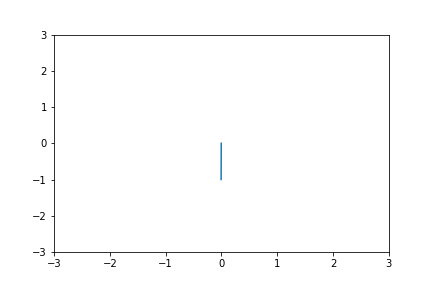

In [22]:
Image("cartpole.gif")